In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

### Install Rasa if not already installed

In [3]:
# !pip install rasa

### Prep data to train the classifier

In [6]:
!ls ../data

nlu.md	stories.md  train-test-split


In [8]:
!ls ../training-data-parsing

AskUbuntuCorpus.json	       human-chat.json	       package-lock.json
askubuntu_in_rasa_format.json  nlu-markdown-tojson.js  parse-json.js
askubuntu_to_rasa_format.js    package.json	       rasa-intents.json


### askubunto_in_rasa_format.json is the AskUbuntu Corpus taken from: https://github.com/sebischair/NLU-Evaluation-Corpora converted into rasa format

AskUbuntu Corpus was prepared for this paper:
@InProceedings{braun-EtAl:2017:SIGDIAL,
  author    = {Braun, Daniel  and  Hernandez-Mendez, Adrian  and  Matthes, Florian  and  Langen, Manfred},
  title     = {Evaluating Natural Language Understanding Services for Conversational Question Answering Systems},
  booktitle = {Proceedings of the 18th Annual SIGdial Meeting on Discourse and Dialogue},
  month     = {August},
  year      = {2017},
  address   = {Saarbrücken, Germany},
  publisher = {Association for Computational Linguistics},
  pages     = {174--185},
  url       = {http://www.aclweb.org/anthology/W17-3622}
}

In [10]:
# will split 80% training/20% test by default
! rasa data split nlu --nlu ../training-data-parsing/askubuntu_in_rasa_format.json --out ../data/train-test-split-ubuntu

2019-07-28 18:48:25 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpvkjxsxp4/f4f32cab87d8431ea2c2c0267cb957b0_askubuntu_in_rasa_format.json' is 'rasa_nlu'.
2019-07-28 18:48:25 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 162 (5 distinct intents)
	- Found intents: 'None', 'Software Recommendation', 'Shutdown Computer', 'Make Update', 'Setup Printer'
	- entity examples: 76 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 18:48:25 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 127 (5 distinct intents)
	- Found intents: 'None', 'Software Recommendation', 'Shutdown Computer', 'Make Update', 'Setup Printer'
	- entity examples: 58 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 18:48:25 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 35 (5 d

In [14]:
!ls ../data/train-test-split-ubuntu

test_data.json	training_data.json


In [11]:
pd.set_option('max_colwidth', -1)

### Convert the training data into a dataframe for training fastai.text

In [15]:
df = pd.read_json('../data/train-test-split-ubuntu/training_data.json')

In [16]:
df.head()

rasa_nlu_data
common_examples  [{'intent': 'Software Recommendation', 'text': 'What's the best Mind Mapping Software?'}, {'intent': 'Software Recommendation', 'text': 'Software to read a QR code?'}, {'intent': 'Software Recommendation', 'text': 'Is there software that can view .dwg files?'}, {'intent': 'Software Recommendation', 'text': 'Can you recommend a password generator?'}, {'intent': 'Software Recommendation', 'text': 'Is there a software utility to adjust screen gamma/brightness/contrast?'}, {'intent': 'Software Recommendation', 'text': 'Is there a tool like wifi analyzer for ubuntu?'}, {'intent': 'Software Recommendation', 'text': 'Is there any recovery software available for ext4?'}, {'intent': 'Software Recommendation', 'entities': [{'start': 34, 'end': 37, 'value': '12.04', 'entity': 'UbuntuVersion'}], 'text': 'Removing Recently used items in 12.04'}, {'intent': 'Software Recommendation', 'text': 'Is there a lightweight tool to crop images quickly?'}, {'intent': 'Software Recommendation', 'text': 'Is there LAN topology mapping software available in Ubuntu?'}, {'intent': 'Software Recommendation', 'text': 'UPNP / DLNA (client) player recommendations?'}, {'intent': 'Software Recommendation', 'text': 'What are some good ASCII art generators?'}, {'intent': 'Software Recommendation', 'text': 'PDF to word conversion software?'}, {'intent': 'Software Recommendation', 'text': 'What Is The Best HDR Software?'}, {'intent': 'Software Recommendation', 'text': 'Is there an application for reading mobi files?'}, {'intent': 'Software Recommendation', 'text': 'What are some good GUI binary viewers/editors?'}, {'intent': 'Software Recommendation', 'text': 'Which programs can I use to edit PDF files?'}, {'intent': 'Software Recommendation', 'entities': [{'start': 5, 'end': 8, 'value': 'IRC', 'entity': 'SoftwareName'}], 'text': 'What IRC clients are available?'}, {'intent': 'Software Recommendation', 'text': 'Any command line calculator for Ubuntu?'}, {'intent': 'Software Recommendation', 'text': 'What blog editor software are available?'}, {'intent': 'Software Recommendation', 'entities': [{'start': 15, 'end': 22, 'value': 'MongoDB', 'entity': 'SoftwareName'}], 'text': 'What is a good MongoDB GUI client?'}, {'intent': 'Software Recommendation', 'text': 'Is there an SSH connection manager?'}, {'intent': 'Software Recommendation', 'text': 'Is there any program for fuzzy string matching which provides a match score?'}, {'intent': 'Software Recommendation', 'text': 'Extracting embedded images from a PDF'}, {'intent': 'Software Recommendation', 'text': 'What scientific plotting software is available?'}, {'intent': 'Software Recommendation', 'text': 'Any app that tells me to take regular breaks from working?'}, {'intent': 'Software Recommendation', 'text': 'What tools do you use to monitor a web server?'}, {'intent': 'Software Recommendation', 'text': 'Password Management Applications?'}, {'intent': 'Software Recommendation', 'text': 'Please recommend a hex editor for shell'}, {'intent': 'Software Recommendation', 'text': 'What's the best Wireframing tool?'}, {'intent': 'Software Recommendation', 'text': 'What software can I use to view epub documents?'}, {'intent': 'Software Recommendation', 'text': 'Tool for recovering deleted data from a flash drive'}, {'intent': 'Software Recommendation', 'text': 'Is there a Linux file manager with a proper drop-down tree view? (like finder in OS X)'}, {'intent': 'Software Recommendation', 'text': 'Which application do you recommend for watching TV (DVB)?'}, {'intent': 'Software Recommendation', 'text': 'A light alternative to gnome-system-monitor?'}, {'intent': 'Software Recommendation', 'entities': [{'start': 65, 'end': 73, 'value': 'Project', 'entity': 'SoftwareName'}], 'text': 'Is there a project management software for Ubuntu like Microsoft Project?'}, {'intent': 'Software Recommendation', 'entities': [{'start': 24, 'end': 30, 'value': 'iTunes', 'entity': 'SoftwareName'}], 'text': 'Applications t

In [20]:
examples = df['rasa_nlu_data']['common_examples']

In [23]:
examples[:3]

[{'intent': 'Software Recommendation',
  'text': "What's the best Mind Mapping Software?"},
 {'intent': 'Software Recommendation', 'text': 'Software to read a QR code?'},
 {'intent': 'Software Recommendation',
  'text': 'Is there software that can view .dwg files?'}]

In [29]:
intents = pd.DataFrame(examples)

In [30]:
intents.head(10)

,entities,intent,text
0,NaN,Software Recommendation,What's the best Mind Mapping Software?
1,NaN,Software Recommendation,Software to read a QR code?
2,NaN,Software Recommendation,Is there software that can view .dwg files?
3,NaN,Software Recommendation,Can you recommend a password generator?
4,NaN,Software Recommendation,Is there a software utility to adjust screen gamma/brightness/contrast?
5,NaN,Software Recommendation,Is there a tool like wifi analyzer for ubuntu?
6,NaN,Software Recommendation,Is there any recovery software available for ext4?
7,"[{'start': 34, 'end': 37, 'value': '12.04', 'entity': 'UbuntuVersion'}]",Software Recommendation,Removing Recently used items in 12.04
8,NaN,Software Recommendation,Is there a lightweight tool to crop images quickly?
9,NaN,Software Recommendation,Is there LAN topology mapping software available in Ubuntu?


In [31]:
intents.describe()

,entities,intent,text
count,58,127,127
unique,58,5,127
top,"[{'start': 17, 'end': 52, 'value': 'Brother MFC-5890CN', 'entity': 'Printer'}]",Software Recommendation,What is a good MongoDB GUI client?
freq,1,45,1


### We have uneven classes and very little data but so is life...

In [32]:
intents.groupby("intent").count()

,entities,text
intent,,
Make Update,34,37
None,0,6
Setup Printer,16,18
Shutdown Computer,1,21
Software Recommendation,7,45


In [36]:
intents = intents.rename(index=str, columns={"intent": "label"}).drop("entities", axis=1)

In [37]:
intents.head()

,label,text
0,Software Recommendation,What's the best Mind Mapping Software?
1,Software Recommendation,Software to read a QR code?
2,Software Recommendation,Is there software that can view .dwg files?
3,Software Recommendation,Can you recommend a password generator?
4,Software Recommendation,Is there a software utility to adjust screen gamma/brightness/contrast?


### Prep the data for the language model

### Chat data thanks to https://github.com/DeepPavlov/convai/tree/master/data
Used data_tolokers.json -- data collected during DeepHack.Chat hackathon in July 2-8 2018 via Yandex.Toloka service (paid workers). 3127 dialogues.


In [38]:
path = Path('/home/jupyter/chat-data')

In [39]:
path.ls()

[PosixPath('/home/jupyter/chat-data/chats.csv'),
 PosixPath('/home/jupyter/chat-data/models'),
 PosixPath('/home/jupyter/chat-data/human-chat.json'),
 PosixPath('/home/jupyter/chat-data/data_clas_export_7_14.pkl'),
 PosixPath('/home/jupyter/chat-data/data_tolokers.json'),
 PosixPath('/home/jupyter/chat-data/intents_for_clas_training.csv'),
 PosixPath('/home/jupyter/chat-data/data_lm_export.pkl'),
 PosixPath('/home/jupyter/chat-data/data_lm_export_7_14.pkl'),
 PosixPath('/home/jupyter/chat-data/combined_chats_and_intents_for_lm_training.csv'),
 PosixPath('/home/jupyter/chat-data/rasa-intents.json')]

In [40]:
chat = pd.read_json(path/'human-chat.json')

In [41]:
chat.head()

,evaluation_score,id,sender,sender_class,text
0,NaN,1,participant1,Human,"Thats good for you, i'm not very into new tech"
1,NaN,3,participant1,Human,I am go to gym and live on donations
2,NaN,5,participant1,Human,So vegan... i have dogs maybe i should told then that they may eat cheap salads insted of meat
3,NaN,7,participant1,Human,Dogs or vegan in office?
4,NaN,9,participant1,Human,Strange answer


In [42]:
# just making the column name the same as the intents df so can concatenate them to train the language model.
# will then just use the intents df for the classifier since the chat labels are meaningless
chat = chat.rename(index=str, columns={"sender_class": "label"}).drop(columns=["evaluation_score", "id", "sender"])

In [43]:
chat.head()

,label,text
0,Human,"Thats good for you, i'm not very into new tech"
1,Human,I am go to gym and live on donations
2,Human,So vegan... i have dogs maybe i should told then that they may eat cheap salads insted of meat
3,Human,Dogs or vegan in office?
4,Human,Strange answer


In [48]:
chat.describe()

,label,text
count,18867,18867
unique,1,13649
top,Human,Hello
freq,18867,223


In [44]:
both_dfs = pd.concat([intents, chat], axis=0, join='outer', join_axes=None, ignore_index=True)

In [45]:
both_dfs.head()

,label,text
0,Software Recommendation,What's the best Mind Mapping Software?
1,Software Recommendation,Software to read a QR code?
2,Software Recommendation,Is there software that can view .dwg files?
3,Software Recommendation,Can you recommend a password generator?
4,Software Recommendation,Is there a software utility to adjust screen gamma/brightness/contrast?


In [46]:
both_dfs.tail()

,label,text
18989,Human,I'm asking about you
18990,Human,Don't waste my time
18991,Human,Are you fucking kidding me?
18992,Human,Shut up
18993,Human,Goodbye


In [47]:
both_dfs.describe()

,label,text
count,18994,18994
unique,6,13776
top,Human,Hello
freq,18867,223


In [49]:
# examples of chats for lm plus additional classifier examples
18867 + 127

18994

In [61]:
# shuffle rows
both_dfs = both_dfs.sample(frac=1).reset_index(drop=True)

In [62]:
both_dfs.head()

,label,text
0,Human,Other than that
1,Human,Do you have a mouth
2,Human,i don't know where i'm from
3,Human,i own a yacht and i rent it out when i am not using it. Have you ever been to yacht?
4,Setup Printer,Installing EPSON L355 on Ubuntu 14.04


In [63]:
both_dfs.to_csv(path/'combined_chats_and_ubuntu_intents_for_lm_training.csv', index=False)

In [64]:
!head -n5 $path/'combined_chats_and_ubuntu_intents_for_lm_training.csv'

label,text
Human,Other than that
Human,Do you have a mouth
Human,i don't know where i'm from
Human,i own a yacht and i rent it out when i am not using it. Have you ever been to yacht?


In [65]:
intents.to_csv(path/'ubuntu_intents_for_clas_training.csv', index=False)

In [66]:
!head $path/'ubuntu_intents_for_clas_training.csv'

label,text
Software Recommendation,What's the best Mind Mapping Software?
Software Recommendation,Software to read a QR code?
Software Recommendation,Is there software that can view .dwg files?
Software Recommendation,Can you recommend a password generator?
Software Recommendation,Is there a software utility to adjust screen gamma/brightness/contrast?
Software Recommendation,Is there a tool like wifi analyzer for ubuntu?
Software Recommendation,Is there any recovery software available for ext4?
Software Recommendation,Removing Recently used items in 12.04
Software Recommendation,Is there a lightweight tool to crop images quickly?


In [67]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'combined_chats_and_ubuntu_intents_for_lm_training.csv', text_cols='text')

In [68]:
# Classififer model data using just the intents file
data_clas = TextClasDataBunch.from_csv(path, 'ubuntu_intents_for_clas_training.csv',
                                       text_cols='text', label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

In [69]:
data_lm.save('data_lm_export_ubuntu_and_chats_7_28.pkl')
data_clas.save('data_clas_export_ubuntu_7_28.pkl')

In [70]:
data_lm = load_data(path, 'data_lm_export_ubuntu_and_chats_7_28.pkl')
data_clas = load_data(path, 'data_clas_export_ubuntu_7_28.pkl')

In [71]:
data_lm

TextLMDataBunch;

Train: LabelList (15195 items)
x: LMTextList
xxbos not great , i hate school so much !,xxbos i 'm fine , thanks 
  xxmaj how are you ?,xxbos i like to watch it in the xxunk,xxbos do you like skating ?,xxbos xxmaj hello 👋 
  xxmaj tell me about yourself !
y: LMLabelList
,,,,
Path: /home/jupyter/chat-data;

Valid: LabelList (3799 items)
x: LMTextList
xxbos xxmaj what kind of person are you i have brown curly hair what about you,xxbos xxmaj what do you think about knitting ?,xxbos i ’m good,xxbos that 's good . i do n't like to drive too . xxmaj it 's not for humans , it 's for xxunk and robots because it 's more xxunk .,xxbos that ’s nice ! i ’m more of a car person
y: LMLabelList
,,,,
Path: /home/jupyter/chat-data;

Test: None

In [72]:
data_lm.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '?',
 'you',
 'i',
 'do',
 '.',
 'a',
 'what',
 'are',
 ',',
 'is',
 'to']

In [73]:
data_clas

TextClasDataBunch;

Train: LabelList (101 items)
x: TextList
xxbos xxmaj is there any xxunk software available for xxunk ?,xxbos upgrading to xxmaj ubuntu 13.10 from xxmaj ubuntu 13.04,xxbos xxmaj xxunk to xxunk xxunk for xxunk xxunk ?,xxbos xxmaj upgrade to 12.04 xxunk bit,xxbos xxmaj how do i show xxunk when xxunk from xxunk ?
y: CategoryList
Software Recommendation,Make Update,Software Recommendation,Make Update,None
Path: /home/jupyter/chat-data;

Valid: LabelList (26 items)
x: TextList
xxbos xxmaj which xxunk do you recommend for watching xxup tv ( xxup xxunk ) ?,xxbos xxmaj how do i xxunk a shutdown problem ?,xxbos xxmaj can not upgrade from xxup xxunk to 14.04,xxbos xxmaj how can i install a xxmaj xxunk xxup xxunk xxunk printer on xxmaj ubuntu,xxbos xxmaj how xxmaj to xxmaj install xxmaj canon xxup xxunk printer in 14.04 xxup lts ? i tried the method for xxup xxunk but it did nt work
y: CategoryList
Software Recommendation,Shutdown Computer,Make Update,Setup Printer,Setup Printe

In [74]:
data_clas.show_batch()

text,target
xxbos xxmaj is there a xxmaj xxunk xxunk manager with a proper drop - down tree view ? ( like finder in xxup xxunk x ),Software Recommendation
xxbos xxmaj how to setup wireless xxunk from a printer connected xxunk xxunk on xxmaj ubuntu xxmaj server 12.10 ?,Setup Printer
xxbos xxmaj how do i upgrade to the release version of 16.04 if i am running xxmaj beta ?,Make Update
xxbos xxmaj how xxmaj do i xxmaj install xxmaj canon xxup xxunk xxmaj printer in xxmaj ubuntu 15.10 ?,Setup Printer
xxbos xxmaj xxunk xxmaj xxunk / xxunk / xxunk full . xxmaj how to get more space ?,Software Recommendation


### Train the language model

In [75]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [76]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


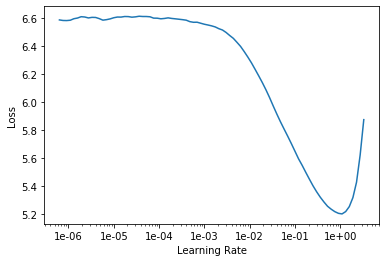

In [77]:
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.829163,4.528593,0.191486,00:04
1,4.544167,3.118282,0.360268,00:04
2,3.831525,2.937717,0.380230,00:04
3,3.441632,2.871536,0.388361,00:04
4,3.193570,2.846777,0.393048,00:04
5,3.046477,2.842733,0.393718,00:04


In [79]:
learn.fit_one_cycle(12, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.850019,2.834297,0.395217,00:04
1,2.828298,2.815281,0.398151,00:04
2,2.801916,2.792423,0.404018,00:04
3,2.768981,2.774498,0.405580,00:04
4,2.722561,2.766858,0.406696,00:04
5,2.673890,2.753078,0.408004,00:04
6,2.633976,2.746462,0.411735,00:04
7,2.588968,2.743128,0.410555,00:04
8,2.554448,2.738241,0.413712,00:04
9,2.530191,2.735552,0.414828,00:04


In [80]:
learn.unfreeze()
learn.fit_one_cycle(6, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.440339,2.722575,0.413967,00:05
1,2.421647,2.720174,0.418814,00:05
2,2.358044,2.702994,0.423533,00:06
3,2.286617,2.703006,0.427551,00:06
4,2.210753,2.712164,0.427870,00:06
5,2.159885,2.713551,0.428540,00:06


In [81]:
learn.fit_one_cycle(6, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.086224,2.713603,0.427328,00:05
1,2.084816,2.726551,0.426690,00:06
2,2.052350,2.740875,0.425765,00:06
3,1.999382,2.767046,0.426499,00:06
4,1.944366,2.792660,0.425064,00:06
5,1.901053,2.788510,0.427679,00:06


In [82]:
learn.save('chat-ubuntu-lm-7-28')
learn.save_encoder('chat-ubuntu-lm-encoder-7-28')

In [83]:
learn.predict("how are you", n_words=20)

'how are you ? ? xxbos Nice . Are you men ? xxbos hi xxbos Oo perfect ! What'

In [84]:
learn.predict("where can", n_words=20)

'where can you not find weight ? xxbos What do you do ? xxbos what kind of hobbies do you have'

### Train the classifier

In [85]:
clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
clas_learn.load_encoder('chat-ubuntu-lm-encoder-7-28')

In [86]:
clas_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


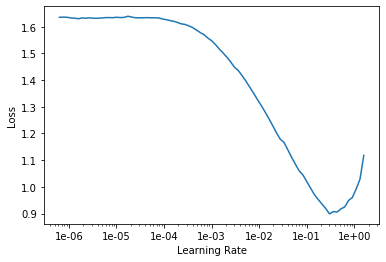

In [87]:
clas_learn.recorder.plot()

In [88]:
clas_learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.646897,1.589498,0.192308,00:00
1,1.637453,1.529331,0.807692,00:00
2,1.437298,1.450879,0.884615,00:00
3,1.304006,1.377280,0.923077,00:00
4,1.204830,1.323095,0.923077,00:00
5,1.124260,1.299246,0.961538,00:00


In [89]:
clas_learn.freeze_to(-2)
clas_learn.fit_one_cycle(6, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.732980,1.288733,0.961538,00:00
1,0.747995,1.226971,0.961538,00:00
2,0.722028,1.153755,0.923077,00:00
3,0.688862,1.085057,0.923077,00:00
4,0.657418,1.040191,0.923077,00:00
5,0.633506,1.015560,0.961538,00:00


In [90]:
clas_learn.unfreeze()
clas_learn.fit_one_cycle(6, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.494681,1.008082,1.000000,00:00
1,0.496346,0.979830,0.961538,00:00
2,0.481999,0.944459,0.961538,00:00
3,0.468154,0.908156,1.000000,00:00
4,0.454208,0.891104,1.000000,00:00
5,0.445986,0.873535,1.000000,00:00


In [91]:
clas_learn.save('chat-ubuntu-clas-7-28')

In [93]:
clas_learn.predict("which database should i use?")

(Category Software Recommendation,
 tensor(4),
 tensor([0.1486, 0.1637, 0.1300, 0.2321, 0.3257]))

In [94]:
clas_learn.predict("how to i turn off?")

(Category Shutdown Computer,
 tensor(3),
 tensor([0.2320, 0.2100, 0.1573, 0.2532, 0.1475]))

In [95]:
clas_learn.predict("my printer won't start")

(Category Shutdown Computer,
 tensor(3),
 tensor([0.2139, 0.1912, 0.1828, 0.2253, 0.1868]))

In [104]:
clas_learn.predict("which ubuntu verion should i be on?")

(Category Make Update,
 tensor(0),
 tensor([0.2416, 0.1579, 0.2060, 0.2126, 0.1819]))

In [106]:
clas_learn.predict("printer setup won't work")

(Category Setup Printer,
 tensor(2),
 tensor([0.1927, 0.1591, 0.3731, 0.1416, 0.1334]))

In [107]:
from fastai.vision import ClassificationInterpretation

In [108]:
interp = ClassificationInterpretation.from_learner(clas_learn)

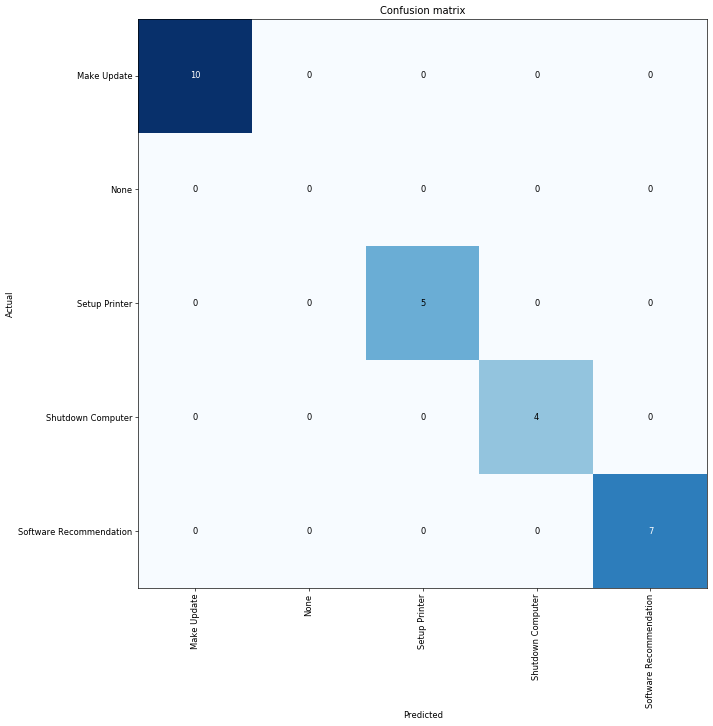

In [109]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [110]:
interp.most_confused()

[]

In [112]:
data_bunch = 'data_clas_export_ubuntu_7_28.pkl'
trained_model = 'chat-ubuntu-clas-7-28'
encoder = 'chat-ubuntu-lm-encoder-7-28'

In [113]:
data_clas = load_data(path, data_bunch, bs=32)
clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
clas_learn.load(trained_model)
clas_learn.load_encoder(encoder)

In [121]:
clas_learn.data.classes

['Make Update',
 'None',
 'Setup Printer',
 'Shutdown Computer',
 'Software Recommendation']

In [146]:
clas_learn.predict('rasa language')

(Category Software Recommendation,
 tensor(4),
 tensor([0.1640, 0.1933, 0.1388, 0.1894, 0.3144]))

### Time to integrate into rasa!

### Create a config using fastai classifier

In [181]:
# make config which uses the pretrained_embeddings_spacy pipeline except switches in FastaiClassifier for the SklearnIntentClassifier

fastai_config = """language: "en"

pipeline:
- name: "SpacyNLP"
- name: "SpacyTokenizer"
- name: "SpacyFeaturizer"
- name: "RegexFeaturizer"
- name: "CRFEntityExtractor"
- name: "EntitySynonymMapper"
- name: "FastaiClassifier"
    
policies:
  - name: MemoizationPolicy
  - name: KerasPolicy
  - name: MappingPolicy"""

In [182]:
store fastai_config > ../fastai_config.yml

Writing 'fastai_config' (str) to file '../fastai_config.yml'.


### Hack to make rasa pick up our new component
Just added the import for FastaiClassifier and added this to the list of component_classes

In [116]:
%%writefile /opt/anaconda3/lib/python3.7/site-packages/rasa/nlu/registry.py
"""This is a somewhat delicate package. It contains all registered components
and preconfigured templates.

Hence, it imports all of the components. To avoid cycles, no component should
import this in module scope."""

import logging
import typing
from typing import Any, Dict, List, Optional, Text, Type

from rasa.nlu.classifiers.embedding_intent_classifier import EmbeddingIntentClassifier
from rasa.nlu.classifiers.keyword_intent_classifier import KeywordIntentClassifier
from rasa.nlu.classifiers.mitie_intent_classifier import MitieIntentClassifier
from rasa.nlu.classifiers.sklearn_intent_classifier import SklearnIntentClassifier
# added this
from rasa.nlu.classifiers.fastai_nlu import FastaiClassifier


from rasa.nlu.extractors.crf_entity_extractor import CRFEntityExtractor
from rasa.nlu.extractors.duckling_http_extractor import DucklingHTTPExtractor
from rasa.nlu.extractors.entity_synonyms import EntitySynonymMapper
from rasa.nlu.extractors.mitie_entity_extractor import MitieEntityExtractor
from rasa.nlu.extractors.spacy_entity_extractor import SpacyEntityExtractor
from rasa.nlu.featurizers.count_vectors_featurizer import CountVectorsFeaturizer
from rasa.nlu.featurizers.mitie_featurizer import MitieFeaturizer
from rasa.nlu.featurizers.ngram_featurizer import NGramFeaturizer
from rasa.nlu.featurizers.regex_featurizer import RegexFeaturizer
from rasa.nlu.featurizers.spacy_featurizer import SpacyFeaturizer
from rasa.nlu.model import Metadata
from rasa.nlu.tokenizers.jieba_tokenizer import JiebaTokenizer
from rasa.nlu.tokenizers.mitie_tokenizer import MitieTokenizer
from rasa.nlu.tokenizers.spacy_tokenizer import SpacyTokenizer
from rasa.nlu.tokenizers.whitespace_tokenizer import WhitespaceTokenizer
from rasa.nlu.utils.mitie_utils import MitieNLP
from rasa.nlu.utils.spacy_utils import SpacyNLP
from rasa.utils.common import class_from_module_path

if typing.TYPE_CHECKING:
    from rasa.nlu.components import Component
    from rasa.nlu.config import RasaNLUModelConfig, RasaNLUModelConfig

logger = logging.getLogger(__name__)


# Classes of all known components. If a new component should be added,
# its class name should be listed here.
component_classes = [
    # utils
    SpacyNLP,
    MitieNLP,
    # tokenizers
    MitieTokenizer,
    SpacyTokenizer,
    WhitespaceTokenizer,
    JiebaTokenizer,
    # extractors
    SpacyEntityExtractor,
    MitieEntityExtractor,
    CRFEntityExtractor,
    DucklingHTTPExtractor,
    EntitySynonymMapper,
    # featurizers
    SpacyFeaturizer,
    MitieFeaturizer,
    NGramFeaturizer,
    RegexFeaturizer,
    CountVectorsFeaturizer,
    # classifiers
    SklearnIntentClassifier,
    MitieIntentClassifier,
    KeywordIntentClassifier,
    EmbeddingIntentClassifier,
    # added this
    FastaiClassifier,
]

# Mapping from a components name to its class to allow name based lookup.
registered_components = {c.name: c for c in component_classes}

# DEPRECATED ensures compatibility, will be remove in future versions
old_style_names = {
    "nlp_spacy": "SpacyNLP",
    "nlp_mitie": "MitieNLP",
    "ner_spacy": "SpacyEntityExtractor",
    "ner_mitie": "MitieEntityExtractor",
    "ner_crf": "CRFEntityExtractor",
    "ner_duckling_http": "DucklingHTTPExtractor",
    "ner_synonyms": "EntitySynonymMapper",
    "intent_featurizer_spacy": "SpacyFeaturizer",
    "intent_featurizer_mitie": "MitieFeaturizer",
    "intent_featurizer_ngrams": "NGramFeaturizer",
    "intent_entity_featurizer_regex": "RegexFeaturizer",
    "intent_featurizer_count_vectors": "CountVectorsFeaturizer",
    "tokenizer_mitie": "MitieTokenizer",
    "tokenizer_spacy": "SpacyTokenizer",
    "tokenizer_whitespace": "WhitespaceTokenizer",
    "tokenizer_jieba": "JiebaTokenizer",
    "intent_classifier_sklearn": "SklearnIntentClassifier",
    "intent_classifier_mitie": "MitieIntentClassifier",
    "intent_classifier_keyword": "KeywordIntentClassifier",
    "intent_classifier_tensorflow_embedding": "EmbeddingIntentClassifier",
}

# To simplify usage, there are a couple of model templates, that already add
# necessary components in the right order. They also implement
# the preexisting `backends`.
registered_pipeline_templates = {
    "pretrained_embeddings_spacy": [
        "SpacyNLP",
        "SpacyTokenizer",
        "SpacyFeaturizer",
        "RegexFeaturizer",
        "CRFEntityExtractor",
        "EntitySynonymMapper",
        "SklearnIntentClassifier",
    ],
    "keyword": ["KeywordIntentClassifier"],
    "supervised_embeddings": [
        "WhitespaceTokenizer",
        "RegexFeaturizer",
        "CRFEntityExtractor",
        "EntitySynonymMapper",
        "CountVectorsFeaturizer",
        "EmbeddingIntentClassifier",
    ],
}


def pipeline_template(s: Text) -> Optional[List[Dict[Text, Text]]]:
    components = registered_pipeline_templates.get(s)

    if components:
        # converts the list of components in the configuration
        # format expected (one json object per component)
        return [{"name": c} for c in components]

    else:
        return None


def get_component_class(component_name: Text) -> Type["Component"]:
    """Resolve component name to a registered components class."""

    if component_name not in registered_components:
        if component_name not in old_style_names:
            try:
                return class_from_module_path(component_name)
            except Exception:
                raise Exception(
                    "Failed to find component class for '{}'. Unknown "
                    "component name. Check your configured pipeline and make "
                    "sure the mentioned component is not misspelled. If you "
                    "are creating your own component, make sure it is either "
                    "listed as part of the `component_classes` in "
                    "`rasa.nlu.registry.py` or is a proper name of a class "
                    "in a module.".format(component_name)
                )
        else:
            # DEPRECATED ensures compatibility, remove in future versions
            logger.warning(
                "DEPRECATION warning: your nlu config file "
                "contains old style component name `{}`, "
                "you should change it to its class name: `{}`."
                "".format(component_name, old_style_names[component_name])
            )
            component_name = old_style_names[component_name]

    return registered_components[component_name]


def load_component_by_meta(
    component_meta: Dict[Text, Any],
    model_dir: Text,
    metadata: Metadata,
    cached_component: Optional["Component"],
    **kwargs: Any
) -> Optional["Component"]:
    """Resolves a component and calls its load method.

    Inits it based on a previously persisted model.
    """

    # try to get class name first, else create by name
    component_name = component_meta.get("class", component_meta["name"])
    component_class = get_component_class(component_name)
    return component_class.load(
        component_meta, model_dir, metadata, cached_component, **kwargs
    )


def create_component_by_config(
    component_config: Dict[Text, Any], config: "RasaNLUModelConfig"
) -> Optional["Component"]:
    """Resolves a component and calls it's create method.

    Inits it based on a previously persisted model.
    """

    # try to get class name first, else create by name
    component_name = component_config.get("class", component_config["name"])
    component_class = get_component_class(component_name)
    return component_class.create(component_config, config)

Overwriting /opt/anaconda3/lib/python3.7/site-packages/rasa/nlu/registry.py


### Actually create our FastaiClassifer component

In [186]:
%%writefile /opt/anaconda3/lib/python3.7/site-packages/rasa/nlu/classifiers/fastai_nlu.py
from rasa.nlu.components import Component
from rasa.nlu import utils
from rasa.nlu.model import Metadata

from fastai import *
from fastai.text import *
import os

import typing
from typing import Any, Optional, Text, Dict


class FastaiClassifier(Component):
    """A pre-trained fastai classifier component"""

    name = "fastai-nlu"
    provides = ["intent"]
    requires = []
    defaults = {}
    language_list = ["en"]
    path = Path('/home/jupyter/chat-data')
    data_bunch = 'data_clas_export_ubuntu_7_28.pkl'
    trained_model = 'chat-ubuntu-clas-7-28'
    encoder = 'chat-ubuntu-lm-encoder-7-28'
    data_clas = load_data(path, data_bunch, bs=32)
    clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
    clas_learn.load(trained_model)
    clas_learn.load_encoder(encoder)

    def __init__(self, component_config=None):
        super(FastaiClassifier, self).__init__(component_config)

    def train(self, training_data, cfg, **kwargs):
        """Not needed, because the the model is pretrained"""
        pass


    def process(self, message, **kwargs):
        """Retrieve the text message, pass it to the classifier
            and append the prediction results to the message class."""
        
#         see example: https://github.com/RasaHQ/rasa/blob/master/rasa/nlu/classifiers/sklearn_intent_classifier.py#L136
        
#         print("message.text!!", message.text)
        predictions = FastaiClassifier.clas_learn.predict(message.text)
        sorted_predictions = sorted(
            zip(FastaiClassifier.clas_learn.data.classes, map(float, predictions[2])),
            key=lambda p: p[1],
            reverse=True
        )
#         print("sorted_predictions!", sorted_predictions)
        intent = {"name": sorted_predictions[0][0], "confidence": sorted_predictions[0][1]}

        intent_ranking = [
            {"name": intent_name, "confidence": score}
            for intent_name, score in sorted_predictions
        ]
#         print("fastai intent_ranking!!", intent_ranking)
        
        message.set("intent", intent, add_to_output=True)
        message.set("intent_ranking", intent_ranking, add_to_output=True)

    def persist(self, file_name, model_dir):
        """Pass because a pre-trained model is already persisted"""

        pass



Overwriting /opt/anaconda3/lib/python3.7/site-packages/rasa/nlu/classifiers/fastai_nlu.py


### Install spacy en libraries since using in the pipeline

In [118]:
# !python -m spacy download en_core_web_md
# !python -m spacy link en_core_web_md en

### Not necessary to convert rasa nlu training data from json to md but did it here so have both formats

In [127]:
! rasa data convert nlu --format md --data '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.json' --out '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.md'



2019-07-28 21:32:45 INFO     rasa.nlu.training_data.loading  - Training data format of '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.json' is 'rasa_nlu'.
2019-07-28 21:32:45 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 127 (5 distinct intents)
	- Found intents: 'Shutdown Computer', 'Setup Printer', 'Make Update', 'Software Recommendation', 'None'
	- entity examples: 58 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'



In [128]:
! rasa data convert nlu --format md --data '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.json' --out '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.md'


2019-07-28 21:33:53 INFO     rasa.nlu.training_data.loading  - Training data format of '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.json' is 'rasa_nlu'.
2019-07-28 21:33:53 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 35 (5 distinct intents)
	- Found intents: 'Software Recommendation', 'Shutdown Computer', 'None', 'Make Update', 'Setup Printer'
	- entity examples: 18 (3 distinct entities)
	- found entities: 'Printer', 'UbuntuVersion', 'SoftwareName'



### Even though our fastai model is pre-trained, need to run rasa train so that pipeline as a whole is trained and rasa creates a zipped model file which will then be used in testing

In [187]:
! rasa train --force nlu \
--nlu '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.md' \
--config ../fastai_config.yml




Training NLU model...
2019-07-28 22:33:54 INFO     rasa.nlu.utils.spacy_utils  - Trying to load spacy model with name 'en'
2019-07-28 22:34:06 INFO     rasa.nlu.components  - Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
2019-07-28 22:34:06 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpt5jujn91/872cd03db7824aecb25041444e0cff38_training_data.md' is 'md'.
2019-07-28 22:34:06 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 127 (5 distinct intents)
	- Found intents: 'Make Update', 'Setup Printer', 'None', 'Shutdown Computer', 'Software Recommendation'
	- entity examples: 58 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 22:34:06 INFO     rasa.nlu.model  - Starting to train component SpacyNLP
2019-07-28 22:34:06 INFO     rasa.nlu.model  - Finished training component.
2019-07-28 22:34:06 INFO     rasa.nlu.model  - Starting to train component SpacyTokenizer
2019-

### Test our pipeline with the fastai classifier on the test set

In [188]:
! rasa test nlu --config ../fastai_config.yml \
-u '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.md' \
--model '/home/jupyter/rasa-fastai/notebooks/models/nlu-20190728-223406.tar.gz' \
--errors './ask-ubuntu-fastai-results/errors.json' \
--confmat './ask-ubuntu-fastai-results/confmat.png'



2019-07-28 22:34:57 INFO     rasa.nlu.components  - Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
2019-07-28 22:34:57 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpvyu2h8fk/624ef76b679c4f82a202d5793bff41de_test_data.md' is 'md'.
2019-07-28 22:34:57 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 35 (5 distinct intents)
	- Found intents: 'Software Recommendation', 'Shutdown Computer', 'Setup Printer', 'Make Update', 'None'
	- entity examples: 18 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 22:34:57 INFO     rasa.nlu.test  - Running model for predictions:
100%|███████████████████████████████████████████| 35/35 [00:01<00:00, 18.31it/s]
2019-07-28 22:34:59 INFO     rasa.nlu.test  - Intent evaluation results:
2019-07-28 22:34:59 INFO     rasa.nlu.test  - Intent Evaluation: Only considering those 35 examples that have a defined intent out of 35 examples
/opt/a

### Accuracy for the fastai_classifier:0.9428571428571428

In [189]:
!head -n 60 'ask-ubuntu-fastai-results/errors.json'

[
  {
    "text": "Security enhancements prevent mounting /dev/sdb1",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.35914137959480286
    }
  },
  {
    "text": "How to provide user permission to read and write on /dev/sdax? What is the syntax?",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.3018698990345001
    }
  }
]

In [190]:
%%html
<img src="./ask-ubuntu-fastai-results/confmat.png" width="800" height="800">

### Train and test with rasa default sklearn pipeline

In [191]:
pretrained_embeddings_spacy_config = """language: "en"

pipeline:
- name: "SpacyNLP"
- name: "SpacyTokenizer"
- name: "SpacyFeaturizer"
- name: "RegexFeaturizer"
- name: "CRFEntityExtractor"
- name: "EntitySynonymMapper"
- name: "SklearnIntentClassifier"
    
policies:
  - name: MemoizationPolicy
  - name: KerasPolicy
  - name: MappingPolicy"""

In [192]:
store pretrained_embeddings_spacy_config > ../pretrained_embeddings_spacy_config.yml

Writing 'pretrained_embeddings_spacy_config' (str) to file '../pretrained_embeddings_spacy_config.yml'.


In [193]:
! rasa train --force nlu \
--nlu '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.md' \
--config ../pretrained_embeddings_spacy_config.yml



Training NLU model...
2019-07-28 22:36:36 INFO     rasa.nlu.utils.spacy_utils  - Trying to load spacy model with name 'en'
2019-07-28 22:36:49 INFO     rasa.nlu.components  - Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
2019-07-28 22:36:49 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpuwysdtsn/bd7ca768a1324c169467cd00758c63a3_training_data.md' is 'md'.
2019-07-28 22:36:49 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 127 (5 distinct intents)
	- Found intents: 'Setup Printer', 'Shutdown Computer', 'Make Update', 'None', 'Software Recommendation'
	- entity examples: 58 (3 distinct entities)
	- found entities: 'UbuntuVersion', 'SoftwareName', 'Printer'

2019-07-28 22:36:49 INFO     rasa.nlu.model  - Starting to train component SpacyNLP
2019-07-28 22:36:49 INFO     rasa.nlu.model  - Finished training component.
2019-07-28 22:36:49 INFO     rasa.nlu.model  - Starting to train component SpacyTokenizer
2019-

In [194]:
! rasa test nlu --config ../pretrained_embeddings_spacy_config.yml \
-u '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.md' \
--model /models/nlu-20190728-223649.tar.gz \
--errors './ask-ubuntu-sklearn-results/errors.json' \
--confmat './ask-ubuntu-sklearn-results/confmat.png'




2019-07-28 22:37:25 INFO     rasa.nlu.components  - Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
2019-07-28 22:37:25 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpl4jwmo1d/00e3b443bb45407fa322fe4ce35fd9c3_test_data.md' is 'md'.
2019-07-28 22:37:25 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 35 (5 distinct intents)
	- Found intents: 'Make Update', 'None', 'Software Recommendation', 'Shutdown Computer', 'Setup Printer'
	- entity examples: 18 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 22:37:25 INFO     rasa.nlu.test  - Running model for predictions:
100%|██████████████████████████████████████████| 35/35 [00:00<00:00, 163.99it/s]
2019-07-28 22:37:25 INFO     rasa.nlu.test  - Intent evaluation results:
2019-07-28 22:37:25 INFO     rasa.nlu.test  - Intent Evaluation: Only considering those 35 examples that have a defined intent out of 35 examples
/opt/a

### Accuracy for the sklearn classifier: 0.9428571428571428

In [195]:
!head -n 60 'ask-ubuntu-sklearn-results/errors.json'

[
  {
    "text": "Security enhancements prevent mounting /dev/sdb1",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.5965297077171444
    }
  },
  {
    "text": "How to provide user permission to read and write on /dev/sdax? What is the syntax?",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.7544331590415874
    }
  }
]

In [196]:
%%html
<img src="./ask-ubuntu-sklearn-results/confmat.png" width="800" height="800">

### Let's try rasa's other default NLU pipeline while we're at it -- the supervised_embeddings pipeline.
This is intended to be used when you have more training data than with the pretrained_embeddings_spacy pipeline. 
See: https://medium.com/rasa-blog/supervised-word-vectors-from-scratch-in-rasa-nlu-6daf794efcd8
This model's approach is more similar to fastai since it is not using pre-trained embeddings.

In [198]:
supervised_embeddings_config = """language: "en"

pipeline:
- name: "WhitespaceTokenizer"
- name: "RegexFeaturizer"
- name: "CRFEntityExtractor"
- name: "EntitySynonymMapper"
- name: "CountVectorsFeaturizer"
- name: "EmbeddingIntentClassifier"
    
policies:
  - name: MemoizationPolicy
  - name: KerasPolicy
  - name: MappingPolicy"""

In [199]:
store supervised_embeddings_config > ../supervised_embeddings_config.yml

Writing 'supervised_embeddings_config' (str) to file '../supervised_embeddings_config.yml'.


In [200]:
! rasa train --force nlu \
--nlu '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/training_data.md' \
--config ../supervised_embeddings_config.yml

Training NLU model...
2019-07-28 22:40:19 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmpf93g3cbv/b107667fa35c47a791c0178a915dd69e_training_data.md' is 'md'.
2019-07-28 22:40:19 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 127 (5 distinct intents)
	- Found intents: 'Setup Printer', 'Make Update', 'Shutdown Computer', 'None', 'Software Recommendation'
	- entity examples: 58 (3 distinct entities)
	- found entities: 'Printer', 'SoftwareName', 'UbuntuVersion'

2019-07-28 22:40:19 INFO     rasa.nlu.model  - Starting to train component WhitespaceTokenizer
2019-07-28 22:40:19 INFO     rasa.nlu.model  - Finished training component.
2019-07-28 22:40:19 INFO     rasa.nlu.model  - Starting to train component RegexFeaturizer
2019-07-28 22:40:19 INFO     rasa.nlu.model  - Finished training component.
2019-07-28 22:40:19 INFO     rasa.nlu.model  - Starting to train component CRFEntityExtractor
2019-07-28 22:40:19 WARNING  ras

In [201]:
! rasa test nlu --config ../supervised_embeddings_config.yml \
-u '/home/jupyter/rasa-fastai/data/train-test-split-ubuntu/test_data.md' \
--model /models/nlu-20190728-224029.tar.gz \
--errors './ask-ubuntu-supervised-embeddings-results/errors.json' \
--confmat './ask-ubuntu-supervised-embeddings-results/confmat.png'



2019-07-28 22:42:18 INFO     rasa.nlu.training_data.loading  - Training data format of '/tmp/tmp7dvicmfm/714cec721cb9444895f56dc2204949a8_test_data.md' is 'md'.
2019-07-28 22:42:18 INFO     rasa.nlu.training_data.training_data  - Training data stats: 
	- intent examples: 35 (5 distinct intents)
	- Found intents: 'Setup Printer', 'Make Update', 'Shutdown Computer', 'None', 'Software Recommendation'
	- entity examples: 18 (3 distinct entities)
	- found entities: 'SoftwareName', 'Printer', 'UbuntuVersion'

2019-07-28 22:42:18 INFO     rasa.nlu.test  - Running model for predictions:
100%|██████████████████████████████████████████| 35/35 [00:00<00:00, 428.44it/s]
2019-07-28 22:42:18 INFO     rasa.nlu.test  - Intent evaluation results:
2019-07-28 22:42:18 INFO     rasa.nlu.test  - Intent Evaluation: Only considering those 35 examples that have a defined intent out of 35 examples
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precisi

### Accuracy for the rasa supervised embeddings classifier: 0.9142857142857143

In [202]:
!head -n 60 'ask-ubuntu-supervised-embeddings-results/errors.json'

[
  {
    "text": "Security enhancements prevent mounting /dev/sdb1",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.9356160759925842
    }
  },
  {
    "text": "How to provide user permission to read and write on /dev/sdax? What is the syntax?",
    "intent": "None",
    "intent_prediction": {
      "name": "Software Recommendation",
      "confidence": 0.7736248970031738
    }
  },
  {
    "text": "In Unity how do I see the details of a given launcher?",
    "intent": "Software Recommendation",
    "intent_prediction": {
      "name": "Shutdown Computer",
      "confidence": 0.6340992450714111
    }
  }
]

In [203]:
%%html
<img src="./ask-ubuntu-supervised-embeddings-results/confmat.png" width="800" height="800">

### Fastai and sklearn performed slightly better than the rasa supervised embeddings clasifier but training and tests sets very small...